# Homework 6: Problems

### ASTROINFORMATICS
https://github.com/astromundus/astroinfo2018/blob/master/homework/HW6.ipynb


## Problem 1: Principal Component Analysis

PCA applied to 4-D data for variable stars from the SDSS and LINEAR surveys:

-- SDSS u-g and g-i colors, 

-- LINEAR variability period (logP) and variability amplitude (A).

Read the data (see below), run PCA (with four components), and then

a) to get familar with the dataset, plot g-i vs. u-g and A vs. logP diagrams

b) plot P2 vs. P1 diagram, and P3 vs. P1 diagram, and P3 vs. P4 diagram. 
Comment what insights, if any, did PCA analysis bring. 

c) plot P1 vs. g-i and P1 vs. logP diagrams; repeat with P2, P3, and P4.
Comment what insights, if any, did PCA analysis bring. 


## Problem 2: Regression and age-color relation for asteroids

We will use age and color data for asteroid families shown in figure 1 from the paper "An age–colour relationship for main-belt S-complex asteroids" by Jedicke et al. (2004, Nature 429, 275), see http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf

Given these y(x) data (see below), with errors in both x and y, 
adapt the code introduced in 
[the last lecture](https://github.com/uw-astr-324-s17/astr-324-s17/blob/master/notebooks/Week-8-Thu.ipynb) 
by modifying the parabola (y(x) = a + b*x + c*x^2) fitter to fit instead
the following function

$$ y(x) = a + b*\left[1-exp\left(-(x/c)^d\right)\right].  $$

Important: here x is time, not log(time)! But when you plot, use log(time)
for x axis (see data below).

a) What are the the best-fit values and standard errors for 
parameters a, b, c and d? 

b) Show the marginal distributions of fitted parameters (hint: use plot_mcmc)

c) compare your best fit to the best fit from Jedicke et al. and comment

d) set all age errors to 1000 years (i.e. to 0.001 in Myr): 
do you get a different best fit? 

<br>
# Homework 1: Solutions

### Some useful definitions and functions

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_LINEAR_geneva
import pymc as pymc
from astroML.plotting.mcmc import plot_mcmc
from sklearn.decomposition import PCA
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

## Problem 1

First obtain LINEAR data for 6,146 stars using astroML built-in function: 

In [2]:
data = fetch_LINEAR_geneva()
# N.B. this is a 7-dimensional dataset
ug = data['ug']
gi = data['gi']
logP = data['logP']
A = data['amp']

In [3]:
X=np.column_stack((ug,gi,logP, A))

In [4]:
X

array([[ 1.166    ,  0.369    , -0.2541378,  0.619    ],
       [ 1.356    ,  0.521    , -0.2446909,  0.709    ],
       [ 1.166    ,  0.138    , -0.6093863,  0.601    ],
       ..., 
       [ 1.63     ,  0.874    , -0.1173616,  0.462    ],
       [ 1.402    ,  0.887    , -0.5277717,  0.734    ],
       [ 1.124    ,  0.568    , -0.468387 ,  0.883    ]])

In [5]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(X)
x

array([[-0.41830115, -0.09079517,  0.55624906,  0.04246182],
       [ 0.13231312,  0.22539814,  0.60214501,  0.08283061],
       [-0.41830115, -0.5713258 , -1.16965741,  0.03438806],
       ..., 
       [ 0.92635684,  0.95971551,  1.22074991, -0.0279593 ],
       [ 0.26561973,  0.98675836, -0.77314858,  0.09404416],
       [-0.54001588,  0.32316844, -0.48463945,  0.16087693]])

Text(0.5, 1.0, 'Log(P) vs A')

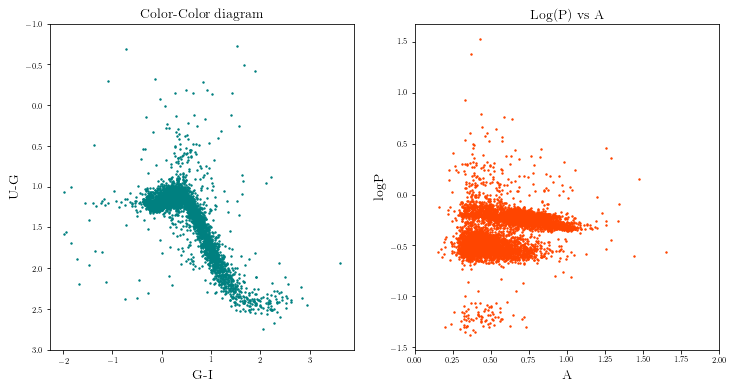

In [6]:
fig,(ax1,ax2)=plt.subplots(1,2, figsize=(12,6))
ax1.scatter(gi,ug, color="teal", s=2)
ax1.set_xlabel('G-I', fontsize=14)
ax1.set_ylabel('U-G', fontsize=14)
ax1.set_title("Color-Color diagram", fontsize=14)
ax1.set_ylim(3,-1)
ax2.scatter(A,logP, color="orangered", s=2)
ax2.set_xlim(0,2)
ax2.set_xlabel('A', fontsize=14)
ax2.set_ylabel("logP", fontsize=14)
ax2.set_title("Log(P) vs A", fontsize=14)


In [7]:
pca=PCA(4, whiten=True)
pca.fit(x)
print(pca.components_)
print("\n\n")
print(pca.explained_variance_ratio_)

B = pca.transform(x)
P=B.T
P1,P2,P3,P4=P

[[ 0.67056846  0.66427779 -0.32811521 -0.03759482]
 [-0.13523943 -0.16006069 -0.50446263 -0.83762063]
 [ 0.16319996  0.19862079  0.79808442 -0.54495579]
 [-0.71092476  0.70261325 -0.03031703 -0.00122   ]]



[ 0.44277037  0.26600712  0.21126657  0.07995594]


### Comment: *More than 90% of the variance is explained by the first 3 PCA components.*

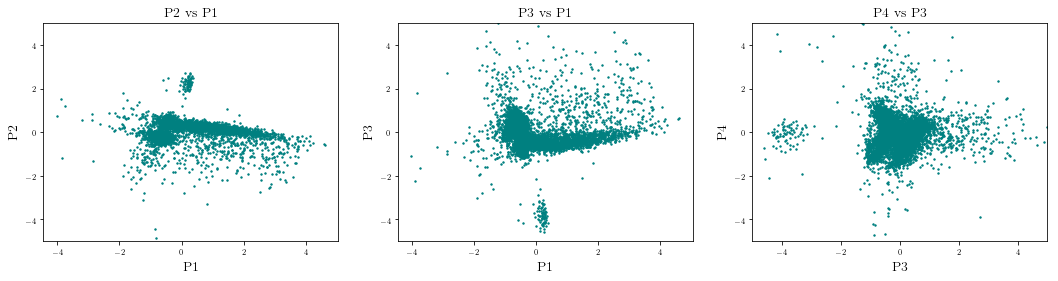

In [8]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(18,4))

ax1.scatter(P1,P2, color="teal", s =2)
ax1.set_ylim(-5,5)
#ax1.set_xlim(-1.0,0.5)
ax1.set_xlabel('P1', fontsize=14)
ax1.set_ylabel('P2', fontsize=14)
ax1.set_title("P2 vs P1", fontsize=14)

ax2.scatter(P1,P3, color="teal", s =2)
#ax2.set_xlim(-2,2)
ax2.set_ylim(-5,5)
ax2.set_ylabel('P3', fontsize=14)
ax2.set_xlabel('P1', fontsize=14)
ax2.set_title("P3 vs P1", fontsize=14)

ax3.scatter(P3,P4, color="teal", s =2)
ax3.set_ylim(-5,5)
ax3.set_xlim(-5,5)
ax3.set_xlabel('P3', fontsize=14)
ax3.set_ylabel('P4', fontsize=14)
ax3.set_title("P4 vs P3", fontsize=14)
plt.show()

## Comment:
Some clustering is onbserved in each of the plots showing some correlation among a few stars in the sample set. Additionally, maximum variance along the P1 axis can be observed from the first 2 plots.

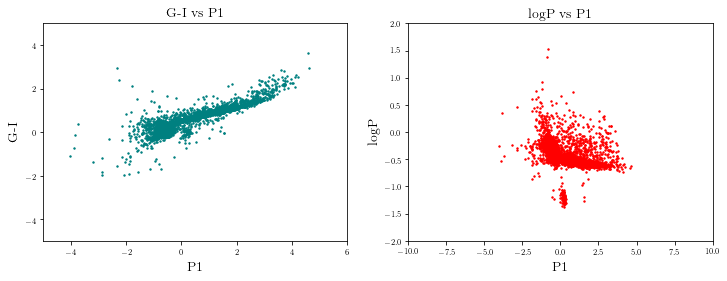

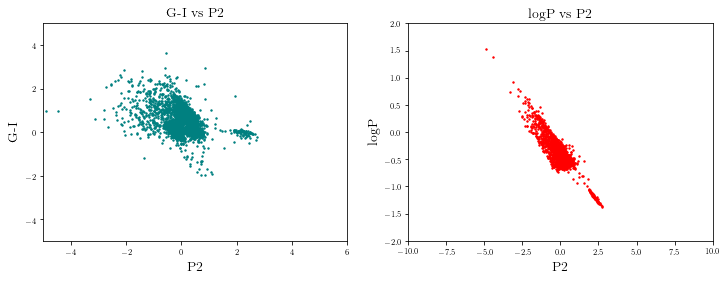

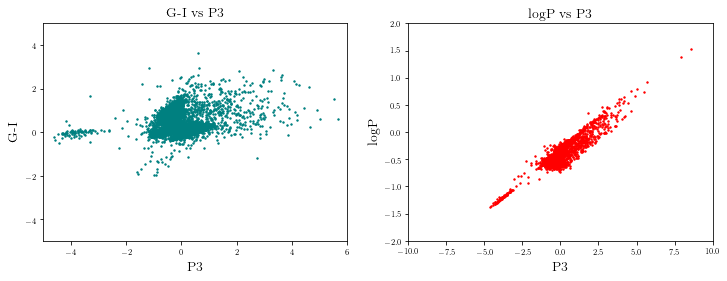

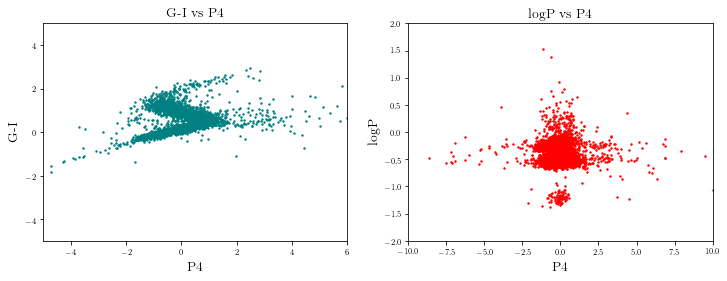

In [9]:
for i in range(4):

    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(12,4))

    ax1.scatter(P[i],gi, color="teal", s=2)
    ax1.set_xlim(-5,6)
    ax1.set_ylim(-5,5)
    ax1.set_xlabel("P"+str(i+1), fontsize=14)
    ax1.set_ylabel("G-I", fontsize=14)
    ax1.set_title("G-I vs P"+str(i+1), fontsize=14)


    ax2.scatter(P[i],logP, color="red", s=2)
    ax2.set_xlim(-10,10)
    ax2.set_ylim(-2,2)
    ax2.set_xlabel("P"+str(i+1), fontsize=14)
    ax2.set_ylabel('logP', fontsize=14)
    ax2.set_title("logP vs P"+str(i+1), fontsize=14)


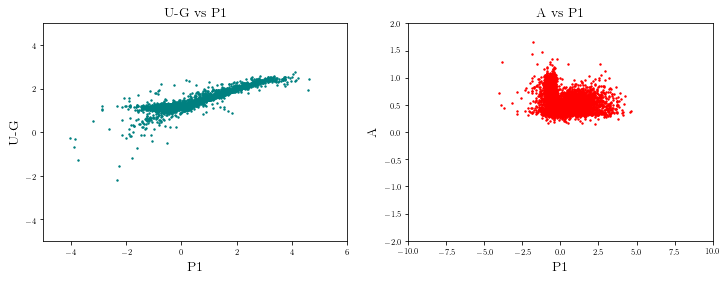

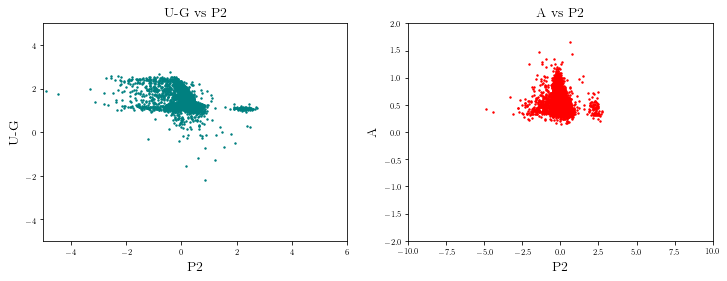

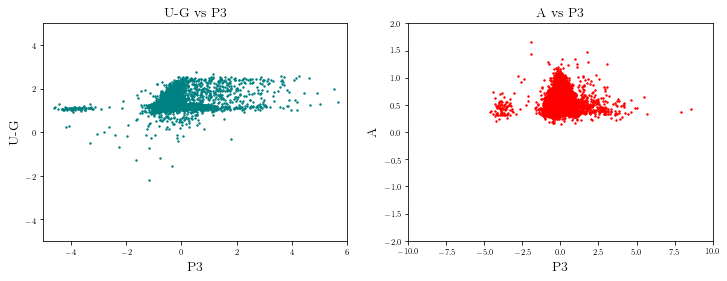

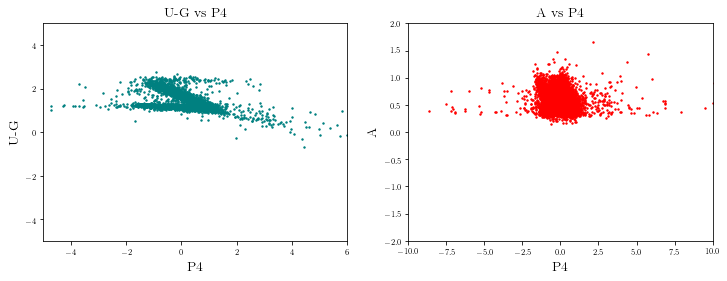

In [10]:
for i in range(4):

    fig,(ax1,ax2)=plt.subplots(1,2, figsize=(12,4))

    ax1.scatter(P[i],ug, color="teal", s=2)
    ax1.set_xlim(-5,6)
    ax1.set_ylim(-5,5)
    ax1.set_xlabel("P"+str(i+1), fontsize=14)
    ax1.set_ylabel("U-G", fontsize=14)
    ax1.set_title("U-G vs P"+str(i+1), fontsize=14)


    ax2.scatter(P[i],A, color="red", s=2)
    ax2.set_xlim(-10,10)
    ax2.set_ylim(-2,2)
    ax2.set_xlabel("P"+str(i+1), fontsize=14)
    ax2.set_ylabel('A', fontsize=14)
    ax2.set_title("A vs P"+str(i+1), fontsize=14)


## Comment:
Correlation can be observed between G-I & P1 and logP & P3. Whereas logP and P2 seem anticorrelated. Additionally, it can be seen that U-G and P1 also seem correlated. This can be interpreted as similar behaviour of U-G and G-I. These variables are strongly correlated. This attests to the observed bheaviour in the color-color diagram.

## Problem 2

These age and color data for asteroid families are taken
from the paper Jedicke et al. (2004, Nature 429, 275), see fig. 1 in http://www.astro.washington.edu/users/ivezic/Publications/jedicke.pdf



In [11]:
# Age is measured in 10^6 yrs (Myr)
# Log10(age) and error (of Log(Age))
logAge = np.asarray([3.398, 2.477, 3.398, 3.477, 3.301, 1.699, 2.699, 0.763,
         2.301, 3.079,  3.176, 0.398])
LageErr = np.asarray([0.087, 0.145, 0.174, 0.145, 0.109, 0.347, 0.174, 0.015,
          0.217, 0.145, 0.145, 0.434])
# SDSS principal asteroid color PC1 and its error (per family)
PC1 = np.asarray([0.620, 0.476, 0.523, 0.582, 0.460, 0.479, 0.432, 0.351, 
       0.427, 0.522, 0.532, 0.311])
PC1err = np.asarray([0.005, 0.015, 0.007, 0.011, 0.005, 0.032, 0.033, 0.047,
        0.021, 0.015, 0.022, 0.027])
# time/age on linear axes
age = 10**logAge
# and standard error propagation (although errors can be large)
ageErr = age * LageErr * np.log(10)

ageErrn=[0.001 for a in ageErr]
err_new=np.asarray(ageErrn)


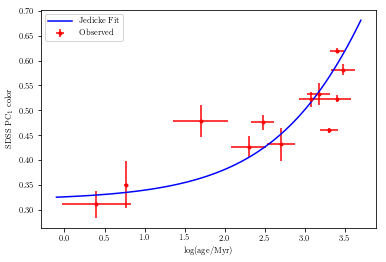

In [12]:
# let's take a quick look at the data to verify that it looks
# similar to fig. 1 from Jedicke et al. 
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
ax = plt.figure().add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='blue', label="Jedicke Fit")
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='r', 
             marker='.', ls='None', label='Observed')
ax.legend()
plt.show() 

In [13]:
def doMCMCexpo(xObs, yObs, xErr, yErr, doXerror = False, nChain = 10000, nBurn = 2000): 
    def model(xObs, yObs, xErr, yErr, doXerror): 
        a = pymc.Uniform('a', -1000, 1000, value= 1.0)
        b = pymc.Uniform('b', -1000, 1000, value= 0.0)
        c = pymc.Uniform('c', 1, 3e4,value=2.5e4 )
        d = pymc.Uniform('d', -1000, 1000, value= 0.0)

        if (doXerror):
            xLatent = pymc.Normal('x', mu=xObs, tau=(xErr)**-2)  
        else:
            xLatent = xObs 
        
        @pymc.deterministic()
        def expo(x=xLatent, a=a, b=b, c=c, d=d):
            return a + b*(1-np.exp(-(x/c)**d))
    
        y = pymc.Normal('y', mu=expo, tau=(yErr)**-2, value=yObs, observed=True)
        return locals()

    myModel = pymc.MCMC(model(xObs,yObs, xErr, yErr, doXerror))
    myModel.sample(nChain, nBurn, 1)
    traces = [myModel.trace(s)[:] for s in ['a', 'b', 'c', 'd']]
    M = pymc.MAP(myModel)
    M.fit()
    fit_vals = (M.a.value, M.b.value, M.c.value, M.d.value)
    return traces, fit_vals

In [14]:
x_obs=age
y_obs=PC1
x_error=ageErr
y_error=PC1err

In [15]:
traces, fit_vals = doMCMCexpo(x_obs, y_obs, x_error, y_error, True, 200000, 2000)

/home/hnlala/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


 [-----------------100%-----------------] 200000 of 200000 complete in 65.7 sec

In [16]:
print("BASIC STATS:")
names=['a','b','c','d']
vals=np.empty(4)
for j in range(4):
    print(names[j],':', np.mean(traces[j]), np.median(traces[j]), np.std(traces[j]))
    vals[j]=np.mean(traces[j])

BASIC STATS:
a : 1.38767237285 1.39837440318 0.179831788912
b : -1.05592312484 -1.06721634387 0.19570556615
c : 13220.8718995 11705.3183577 7612.43006199
d : -0.222354149416 -0.213430541639 0.053339142977


In [17]:
fit_vals

(array(1.8445219033442681),
 array(-1.5159597461892633),
 array(29999.999999934793),
 array(-0.2059273904724433))

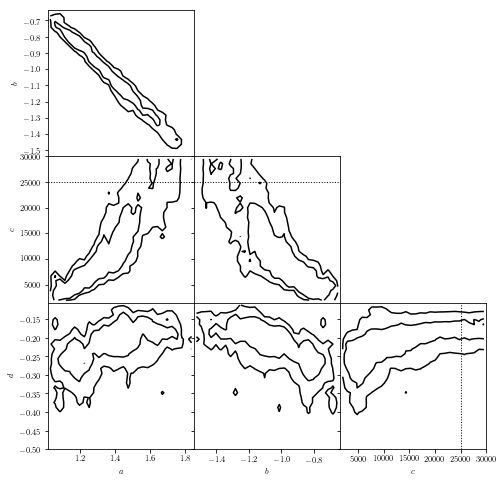

In [18]:
labels = ['$a$', '$b$','$c$','$d$']
#limits = [(0, 3), (1.8, 2.8), (500,1000), (-1,1)]
#TLS = [b_fit3, m_fit3]
trued=[0.32, 1.0,2.5e4,0.5]
tru=[0.9,-0.6,600,-0.3]
fig = plt.figure(figsize=(7, 7))
fig.subplots_adjust(bottom=0.1, top=0.95, left=0.1, right=0.95,
                    hspace=0.05, wspace=0.05)

# This function plots multiple panels with the traces
plot_mcmc(traces, labels=labels, true_values=trued, fig=fig,
          bins=30, colors='k')#, limits=limits,

plt.show()

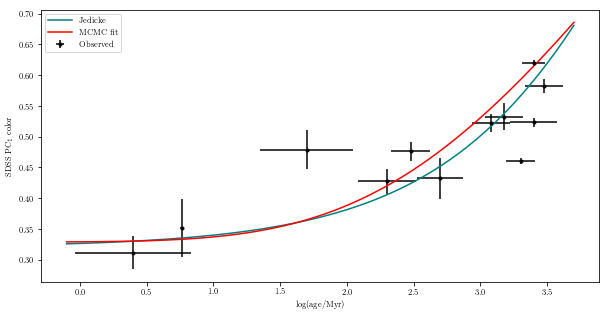

In [19]:
a1,b1,c1,d1=fit_vals

logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
color_obs = a1 + b1*(1-np.exp(-(time/c1)**d1))
ax = plt.figure(figsize=(10,5)).add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='teal', label="Jedicke")
ax.plot(logT,color_obs, c='red', label="MCMC fit")
ax.plot()
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='k', 
             marker='.', ls='None', label='Observed')
ax.legend()
plt.show() 

## Setting age errors to be 0.001

In [20]:
traces_err, fit_vals_err = doMCMCexpo(x_obs, y_obs, err_new , y_error, True, 200000, 2000)

/home/hnlala/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app


 [-                 3%                  ] 6317 of 200000 complete in 2.0 sec

/home/hnlala/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in power
  from ipykernel import kernelapp as app


 [-----------------100%-----------------] 200000 of 200000 complete in 66.8 sec

In [21]:
fit_vals_err

(array(0.46280473657501786),
 array(0.12379561707420138),
 array(2267.4949416472723),
 array(654.066372858206))

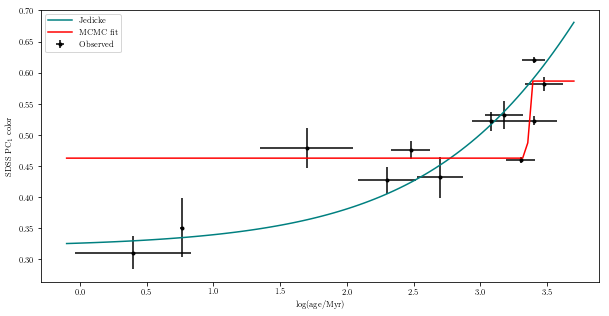

In [22]:
a1,b1,c1,d1=fit_vals_err
logT = np.linspace(-0.1, 3.7, 100)
time = np.power(10,logT)
# the best fit from Jedicke et al. 
color = 0.32 + 1.0*(1-np.exp(-(time/2.5e4)**0.5))
color_obs = a1 + b1*(1-np.exp(-(time/c1)**d1))
ax = plt.figure(figsize=(10,5)).add_subplot(111)
ax.set_xlabel("log(age/Myr)")
ax.set_ylabel("SDSS PC$_1$ color")
ax.plot(logT,color, c='teal', label="Jedicke")
ax.plot(logT,color_obs, c='red', label="MCMC fit")
ax.errorbar(logAge,PC1,xerr=LageErr, yerr=PC1err, color='k', 
             marker='.', ls='None', label='Observed')
ax.legend()
plt.show() 

#### The step of setting all age errors to 1000 years does not produce a better fit, evidently.